# Face Detection to unlock your door
This is a sample program which detects who the person in real time video, using the webcam of your laptop. My aim behind this project was to use this with arduino or other device and use external camera to get the video and for the detection. But for now this is done using our laptop camera. 



I used my own training and validation data to train and validate my model which then predicted from the test images from my google drive directory.

The cv2, which was suppose to help capture video from the webcam did not work in this google collab. So I had to use an upgraded form  code snippets, which is at the lower left side of google collab. The following are some resources I used to make this project possible. 


Reffered tutorial to classify images
https://www.tensorflow.org/tutorials/images/classification

Reffered documentation for image data generation from an updates Tensorflow version.
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# import dependencies for real time video
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from google.colab.patches import cv2_imshow
from PIL import Image
import PIL
import io
import html
import time

In [ ]:
#using tf to load a sample image
img = tf.keras.utils.load_img('/content/drive/MyDrive/Python project/Face_Detection/Data/train/Saksham/Screen Shot 2022-11-08 at 6.45.11 PM.png')

In [ ]:
#the following is the matrix array of the sample image with row, column posiiton and the RGB value at that position.
cv2.imread('/content/drive/MyDrive/Python project/Face_Detection/Data/train/Saksham/Screen Shot 2022-11-08 at 6.45.11 PM.png')

array([[[200, 222, 231],
        [199, 221, 230],
        [199, 221, 230],
        ...,
        [198, 222, 234],
        [202, 224, 235],
        [205, 226, 237]],

       [[200, 222, 231],
        [199, 221, 230],
        [199, 221, 230],
        ...,
        [196, 220, 232],
        [200, 222, 233],
        [203, 224, 235]],

       [[200, 222, 231],
        [199, 221, 230],
        [199, 221, 230],
        ...,
        [194, 218, 230],
        [197, 219, 230],
        [200, 221, 232]],

       ...,

       [[ 91, 127, 136],
        [ 95, 129, 139],
        [ 97, 131, 141],
        ...,
        [221, 228, 233],
        [207, 214, 220],
        [210, 217, 223]],

       [[ 87, 121, 131],
        [ 94, 127, 137],
        [100, 132, 143],
        ...,
        [218, 225, 230],
        [212, 219, 224],
        [205, 212, 218]],

       [[ 84, 116, 126],
        [ 92, 123, 133],
        [101, 131, 142],
        ...,
        [226, 233, 238],
        [223, 230, 235],
        [219, 226, 231]]

In [ ]:
#setting up the training an validation dataset which are in my google drive
train_dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Python project/Face_Detection/Data/train/',
                                                      validation_split=0.2,
                                                      seed = 123,
                                                      subset="training",
                                                      batch_size = 32)

validation_dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Python project/Face_Detection/Data/validation/',
                                                      validation_split=0.2,
                                                      seed = 123,
                                                      subset="validation",
                                                      batch_size = 32)

Found 47 files belonging to 2 classes.
Using 38 files for training.
Found 15 files belonging to 2 classes.
Using 3 files for validation.


In [ ]:
class_names = ['Saksham', 'Saleem'] #Two class names: one is me and another one is my roommate. 

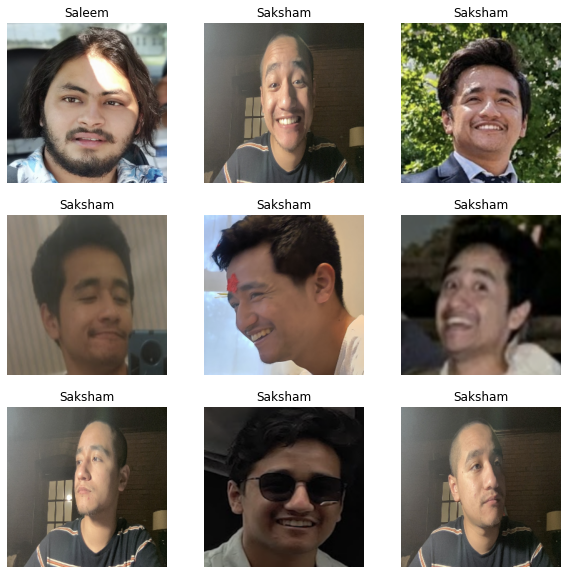

In [ ]:
#ploting some images from the training directory 
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
#this code and the following model layers were used from the tensorflow's sample image detection documentation
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = 2 #one Saksham and two Saleem

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256 ,256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#model fitting with epochs 30

model_fit = model.fit(train_dataset,
                      validation_data = validation_dataset,
                      epochs = 30)


Epoch 1/30
2/2 [==============================] - 4s 2s/step - loss: 1.5648 - accuracy: 0.4737 - val_loss: 0.8283 - val_accuracy: 0.3333
Epoch 2/30
2/2 [==============================] - 0s 74ms/step - loss: 0.6124 - accuracy: 0.6842 - val_loss: 0.8220 - val_accuracy: 0.6667
Epoch 3/30
2/2 [==============================] - 0s 63ms/step - loss: 1.5631 - accuracy: 0.3684 - val_loss: 0.4858 - val_accuracy: 0.6667
Epoch 4/30
2/2 [==============================] - 0s 70ms/step - loss: 0.7217 - accuracy: 0.3947 - val_loss: 0.7735 - val_accuracy: 0.3333
Epoch 5/30
2/2 [==============================] - 1s 70ms/step - loss: 0.6427 - accuracy: 0.6316 - val_loss: 0.8978 - val_accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 1s 69ms/step - loss: 0.6592 - accuracy: 0.6316 - val_loss: 0.8217 - val_accuracy: 0.3333
Epoch 7/30
2/2 [==============================] - 0s 65ms/step - loss: 0.6106 - accuracy: 0.6316 - val_loss: 0.9229 - val_accuracy: 0.3333
Epoch 8/30
2/2 [=============

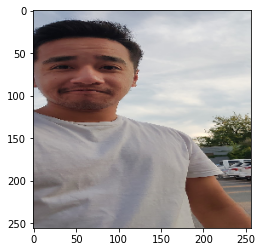

1/1 [==============================] - 0s 16ms/step
0
This is Saksham


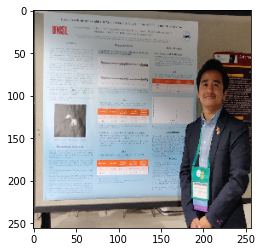

1/1 [==============================] - 0s 15ms/step
0
This is Saksham


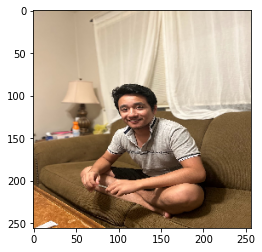

1/1 [==============================] - 0s 18ms/step
1
This is Saleem


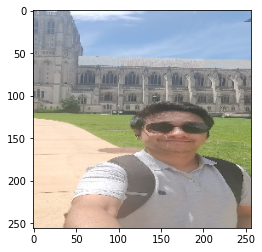

1/1 [==============================] - 0s 20ms/step
1
This is Saleem


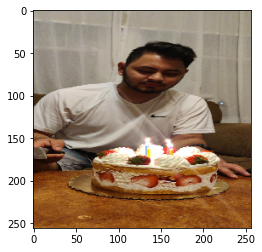

1/1 [==============================] - 0s 16ms/step
1
This is Saleem


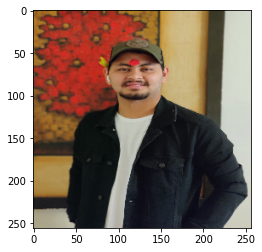

1/1 [==============================] - 0s 22ms/step
1
This is Saleem


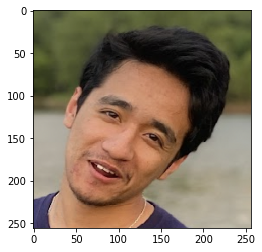

1/1 [==============================] - 0s 17ms/step
0
This is Saksham


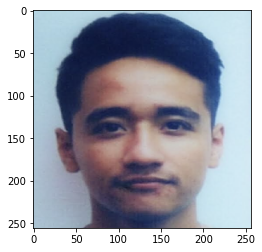

1/1 [==============================] - 0s 17ms/step
0
This is Saksham


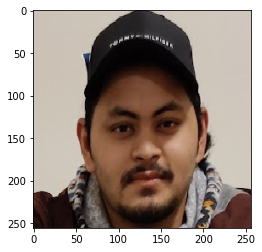

1/1 [==============================] - 0s 16ms/step
1
This is Saleem


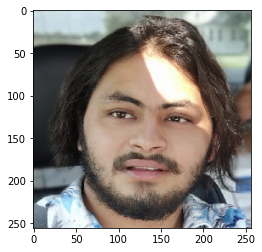

1/1 [==============================] - 0s 16ms/step
1
This is Saleem


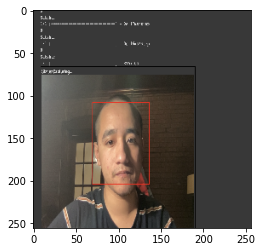

1/1 [==============================] - 0s 19ms/step
0
This is Saksham


In [ ]:
#predicting from the test directory images

dir_path = '/content/drive/MyDrive/Python project/Face_Detection/Data/test'

for i in os.listdir(dir_path):
  #loading each images
  img = tf.keras.utils.load_img(dir_path+'//' + i, target_size=(256,256,3))
  
  #plotting the image
  plt.imshow(img)
  plt.show()

  #converting image to array form
  X = tf.keras.preprocessing.image.array_to_img(img)
  X = np.expand_dims(X, axis = 0)
  images = np.vstack([X])

  #using the model to predict the test images
  val = model.predict(images)
  val = np.argmax(val)
  print(val)
  if val == 0:
    print('This is Saksham')
  if val == 1:
    print("This is Saleem")

## Real-time Video Detection

 https://www.youtube.com/watch?v=YjWh7QvVH60&t=284s "How to Use Webcam In Google Colab for Images and Video (FACE DETECTION)" by the AI guy.
 This youtube video which I reffered to helped to create a box outside of the face.


In [ ]:
# function to convert the JavaScript object into an OpenCV image 
# this is added because the cv2 does not completely work in google collab
def js_to_image(js_reply):
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

The webcam video is captured and an rectangular box is created around the face. The image inside the box is cropped and the cropped image is used by the model for prediction. 

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 15ms/step
0
Saksham
The door is unlocked!
1/1 [==============================] - 0s 15ms/step
1
Saleem
Can't unlock the door!
1/1 [==============================] - 0s 16ms/step
0
Saksham
The door is unlocked!


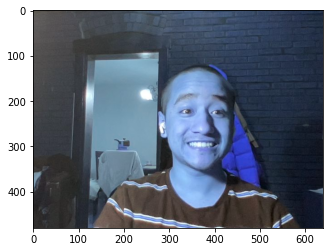

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
      faces_crop = img[y:y + h, x:x + w]

      #resizing the cropped face to match the size which I used to make the model
      resized = cv2.resize(faces_crop, (256,256), interpolation = cv2.INTER_AREA)
      X = tf.keras.preprocessing.image.array_to_img(resized)
      X = np.expand_dims(X, axis = 0)
      resized = np.vstack([X])

      #predicting model from each cropped frame
      val = model.predict(resized)
      val = np.argmax(val)
      print(val)

      #Giving access Saksham to unclock the door
      if val == 0:
        print(class_names[val])
        print('The door is unlocked!')
      if val == 1:
        print(class_names[val])
        print("Can't unlock the door!")
          
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

#plotting a cam image from the webcam
plt.imshow(img)
plt.show()

# The following is the screenshot of the real time video from web camera


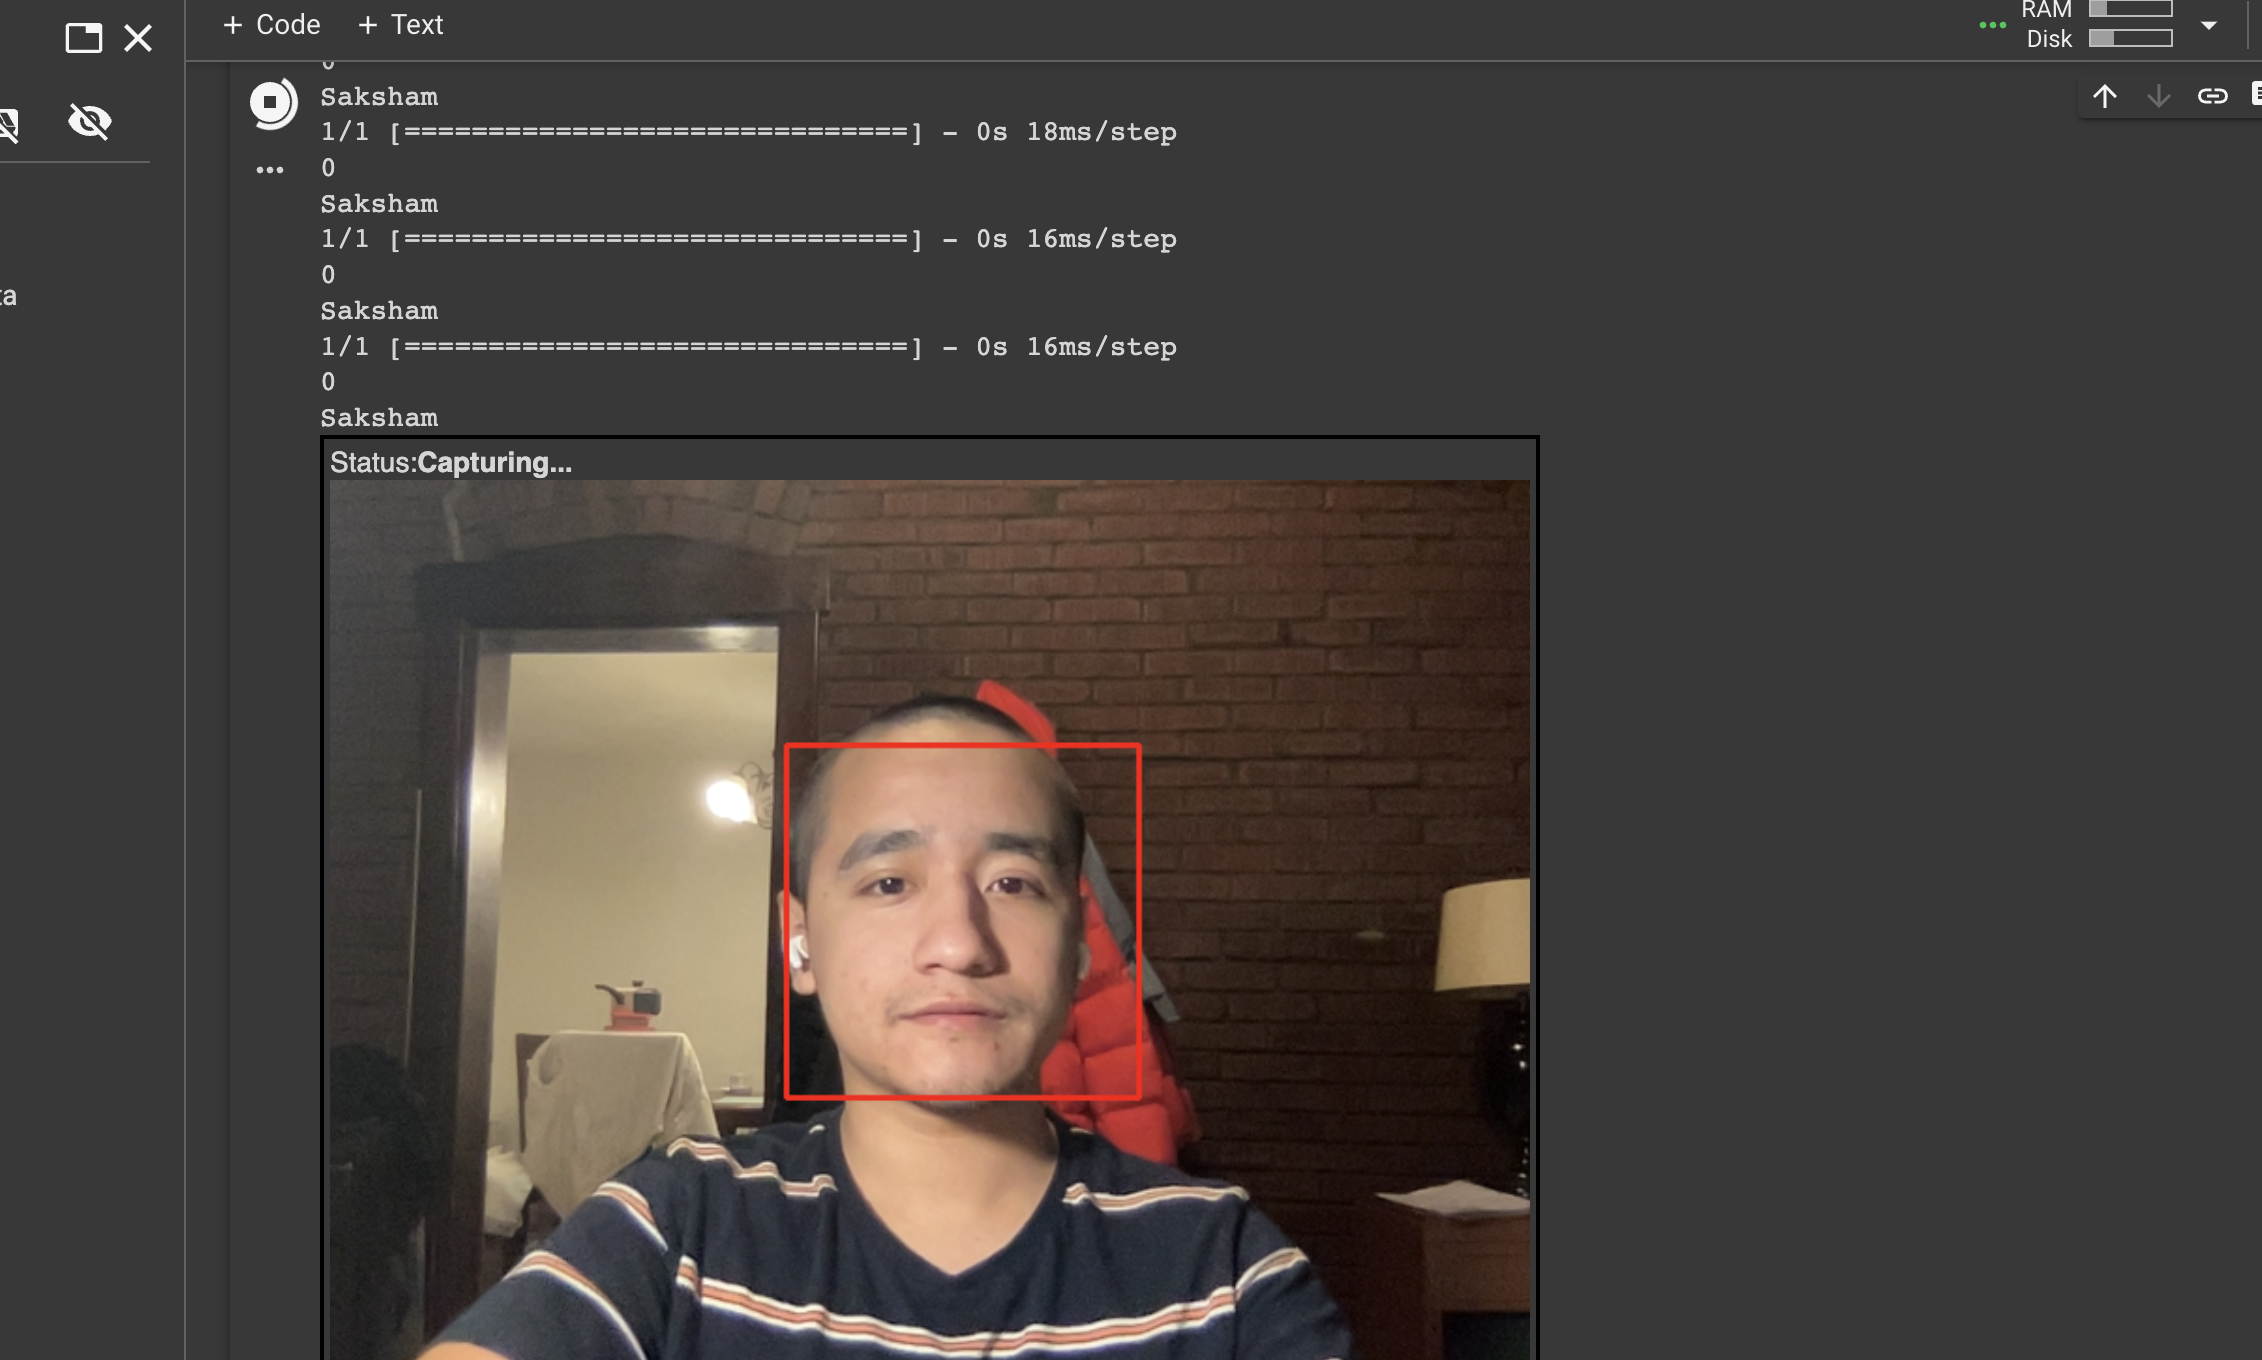

In [1]:
%%shell
jupyter nbconvert --to html final_project_Saksham.ipynb

[NbConvertApp] Converting notebook final_project_Saksham.ipynb to html
[NbConvertApp] Writing 4328699 bytes to final_project_Saksham.html
